### Minimizers

One way to partition the space of all possible $k$-mers is by minimal $l$-mer, where $l < k$.  For example, the minimal 2-mer in the string `ABC` is `AB` and the minimal 4-mer in the string `abracadabra` is `abra`.  In this context, the minimal $l$-mer is called a *minimizer*, and we'll call such a partitioning scheme a $k, l$-minimizing scheme.

In [1]:
def string_to_kmers(s, length):
    return [s[i:i+length] for i in xrange(len(s)-length+1)]

def minimizer(k, l):
    """ Given k-mer, return its minimal l-mer """
    assert l <= k
    return min(string_to_kmers(k, l))

In [2]:
minimizer('ABC', 2)

'AB'

In [3]:
minimizer('abracadabra', 4)

'abra'

But if our goal is to partition the space of $k$-mers, couldn't we use a hash function instead?  Say $k$ is 10 and $l$ is 4.  A 10,4-minimizing scheme is a way for dividing the space of $4^{10}$ 10-mers (a million or so) into $4^4 = 256$ partitions.  We can accomplish this with a hash function that maps $k$-mers to integers in $[0, 255]$.  Why would we prefer minimizers over hash functions?

The answer is that two strings that share long substrings tend to have the same minimizer, but not the same hash value.  For example, the strings `abracadabr` and `bracadabra` have the substring `bracadabr` in common, and they have the same minimal 4-mer:

In [4]:
minimizer('abracadabr', 4), minimizer('bracadabra', 4)

('abra', 'abra')

But their hash values (modulo 256) are not the same:

In [5]:
# you might need to 'pip install mmh3' first
import mmh3
mmh3.hash('abracadabr') % 256, mmh3.hash('bracadabra') % 256

(26, 224)

#### Partition size distribution

A feature of hash functions is that they divide the 10-mers quite evenly among the 256 buckets.   10,4-minimzers divide them much less evenly.  This becomes clear when you consider that, given a random 10-mer, the 4-mer `TTTT` is very unlikely to be its minimizer, whereas the 4-mer `AAAA` is much more likely.

We can also show this empirically by partitioning a collection of random 10-mers:

In [6]:
import random
random.seed(629)

def random_kmer(k):
    return ''.join([random.choice('ACGT') for _ in xrange(k)])

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt 

def plot_counts(counter, title=None):
    idx = range(256)
    cnts = map(lambda x: counter.get(x, 0), idx)
    plt.bar(idx, cnts, ec='none')
    plt.xlim(0, 256)
    plt.ylim(0, 35)
    if title is not None:
        plt.title(title)
    plt.show()

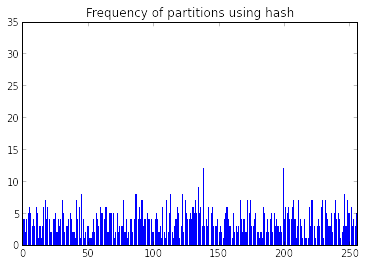

In [14]:
from collections import Counter
# hash 1000 random 10-mers
cnt = Counter([mmh3.hash(s) % 256 for s in [random_kmer(10) for _ in xrange(1000)]])
plot_counts(cnt, 'Frequency of partitions using hash mod 256')

In [9]:
def lmer_to_int(lmer):
    cum = 0
    charmap = {'A':0, 'C':1, 'G':2, 'T':3}
    for c in lmer:
        cum *= 4
        cum += charmap[c]
    return cum

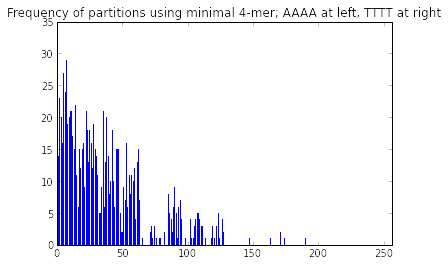

In [15]:
# get minimal 4-mers from 1000 random 10-mers
cnt = Counter([lmer_to_int(minimizer(s, 4)) for s in [random_kmer(10) for _ in xrange(1000)]])
plot_counts(cnt, 'Frequency of partitions using minimal 4-mer; AAAA at left, TTTT at right')

In [16]:
#### TODO: Salting minimizers

In [ ]:
#### TODO: Making minimizer 